# Distrubtion of top ASVs 

# 1. Install packages

In [1]:
# install.packages("devtools")
# library(devtools)
# source("https://raw.githubusercontent.com/microbiome/OMA/master/install_packages.R")

# 2. Load required libraries

In [2]:
library(mia, verbose=F)
# library(miaTime) # NOTE: this package fails to install but it seems that we don't need it for the visualizations I want to recreate
library(miaViz, verbose=F)
library(phyloseq, verbose=F)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

# 3. Load data and convert to TSE format

In [3]:
load("../02-diversity/master_phyloseq.RData")
ps.dat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14111 taxa and 1960 samples ]
sample_data() Sample Data:       [ 1960 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 14111 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 14111 tips and 14109 internal nodes ]

In [4]:
# convert phyloseq obejct to tree summarized experiment object
tse <- makeTreeSummarizedExperimentFromPhyloseq(ps.dat)
# convert to relative abundance
tse <- transformCounts(tse, method="relabundance")

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


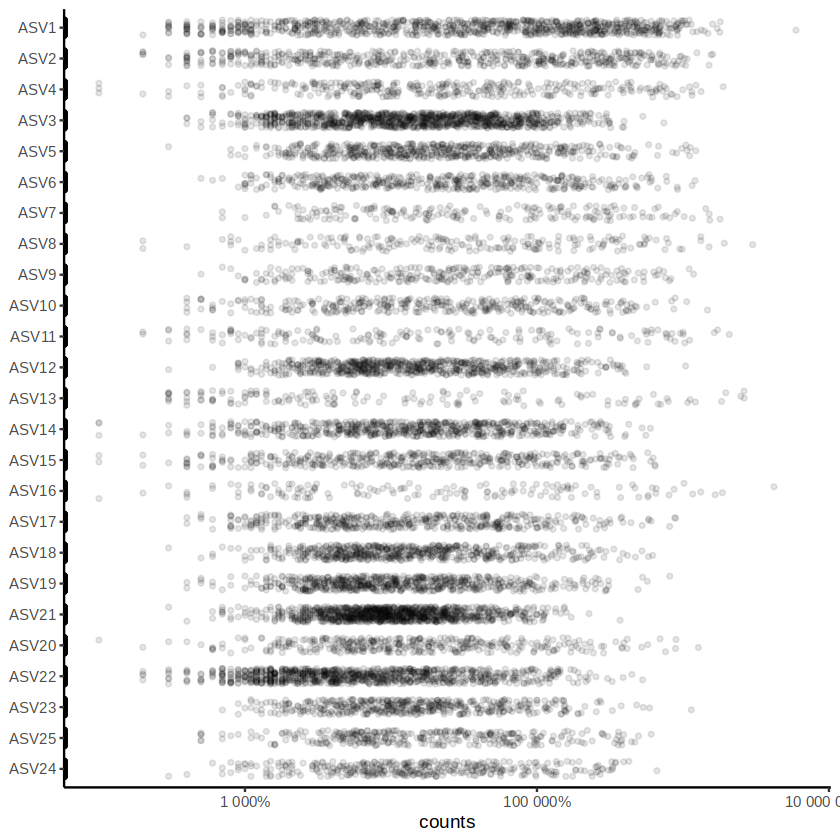

In [5]:
# scatter plot of relative abundance across all samples
plotAbundanceDensity(tse, 
                     layout = "jitter",
                     n = 25, 
                     point_size=1, 
                     point_shape=19, 
                     point_alpha=0.1) + 
                     scale_x_log10(label=scales::percent)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6415 rows containing non-finite values (`stat_density()`).”


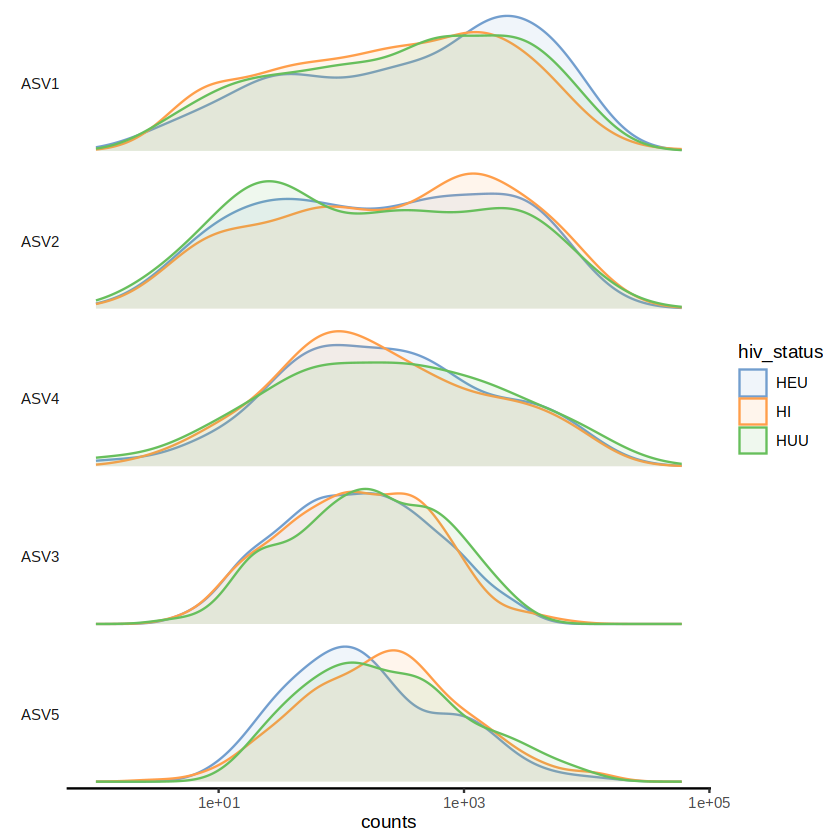

In [6]:
# top five ASVs by hiv_status 
plotAbundanceDensity(tse, layout = "density",
                     n = 5, 
                     colour_by="hiv_status", 
                     point_alpha=1/10) +
                     scale_x_log10()

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6415 rows containing non-finite values (`stat_density()`).”


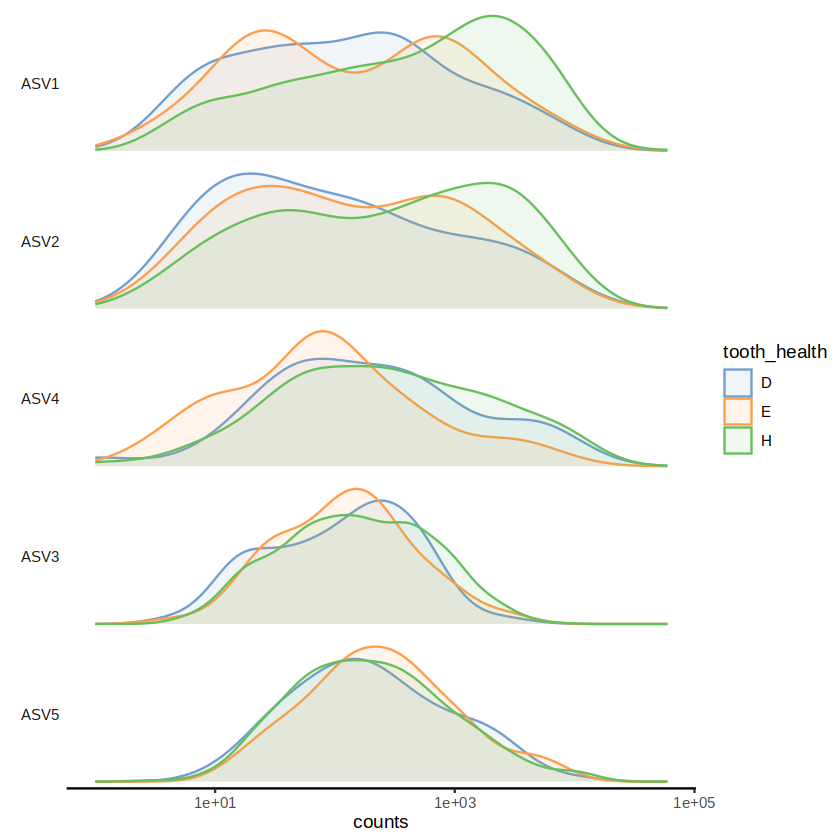

In [7]:
# top five ASVs by tooth_health 
plotAbundanceDensity(tse, layout = "density",
                     n = 5, 
                     colour_by="tooth_health", 
                     point_alpha=1/10) +
                     scale_x_log10()

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6415 rows containing non-finite values (`stat_density()`).”


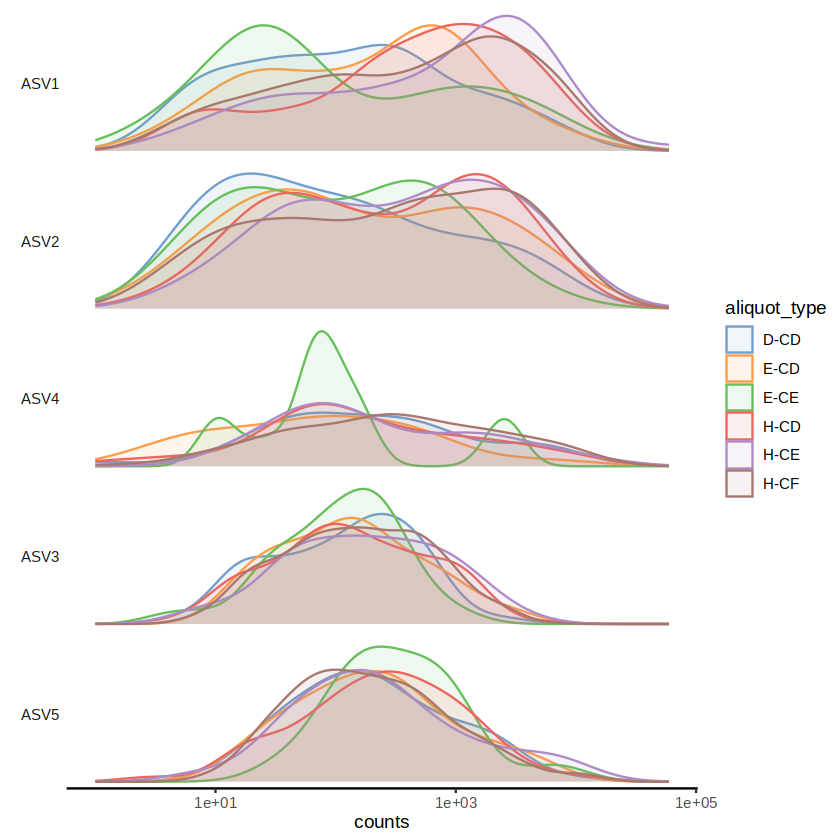

In [8]:
# top five ASVs by aliquot_type 
plotAbundanceDensity(tse, layout = "density",
                     n = 5, 
                     colour_by="aliquot_type", 
                     point_alpha=1/10) +
                     scale_x_log10()

In [9]:
# are there major changes in the frequency of top taxa across visits for each hiv status group?
tse.hi <- makeTreeSummarizedExperimentFromPhyloseq(subset_samples(ps.dat, hiv_status="HI"))
tse.hi

class: TreeSummarizedExperiment 
dim: 14111 1960 
metadata(0):
assays(1): counts
rownames(14111): ASV1657 ASV746 ... ASV2906 ASV5597
rowData names(8): V2 V3 ... V8 V9
colnames(1960): DM00001V1PQ DM00001V2PQ16 ... DM00568V2PQ55
  DM00568V3PQ16
colData names(24): DNA_ng.ul rpoC_amplicon_count ... file_R1 file_R2
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
rowLinks: a LinkDataFrame (14111 rows)
rowTree: 1 phylo tree(s) (14111 leaves)
colLinks: NULL
colTree: NULL

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 6415 rows containing non-finite values (`stat_density()`).”


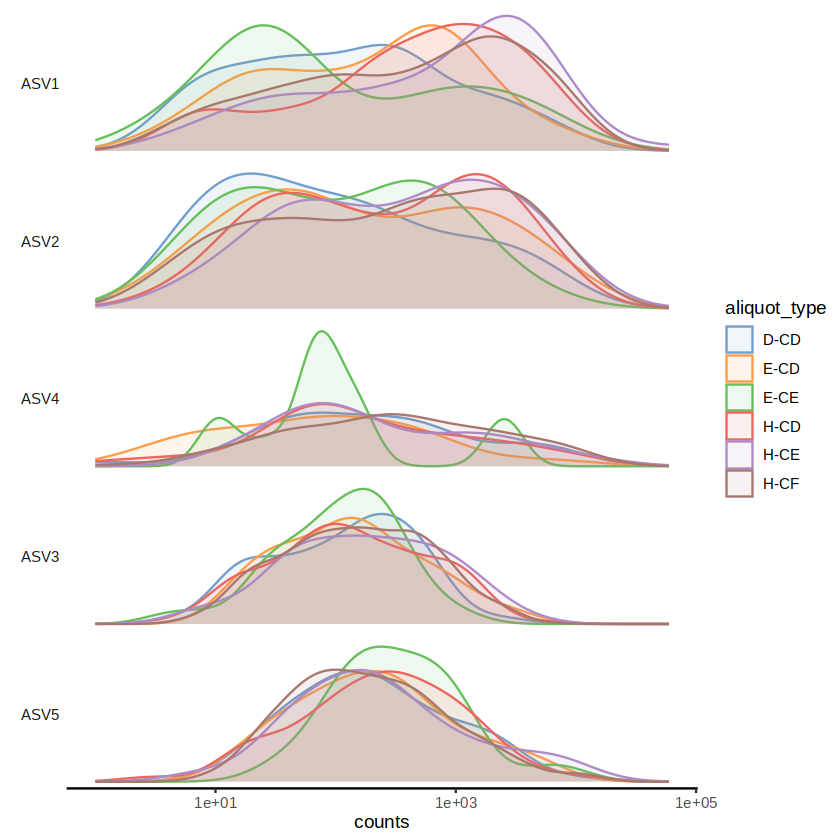

In [10]:
plotAbundanceDensity(tse, layout = "density",
                     n = 5, 
                     colour_by="aliquot_type", 
                     point_alpha=1/10) +
                     scale_x_log10()